In [27]:
import pandas as pd
url='https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv'
titanic_df = pd.read_csv(url, sep='\t')

In [28]:
new_columns = ['passengerId', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
titanic_df.columns = new_columns # change to lower case for the columns
titanic_df.head()

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic_df1 = titanic_df[['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare']]
# columns related to survival
titanic_df1.head()

,survived,pclass,name,sex,age,sibsp,parch,fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


In [30]:
titanic_df1.loc[:, 'gender'] = titanic_df1.loc[:, 'sex'].map({'female': 0, 'male' : 1})
titanic_df1.drop(columns='sex', inplace=True)
titanic_df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\2937082141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.loc[:, 'gender'] = titanic_df1.loc[:, 'sex'].map({'female': 0, 'male' : 1})
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\2937082141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(columns='sex', inplace=True)


,survived,pclass,name,age,sibsp,parch,fare,gender
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1


In [31]:
condition = lambda x: x.split(',')[1].split('.')[0].strip()
titanic_df1['title'] = titanic_df1['name'].map(condition)

# for special names, use "special"
special = ['Master', 'Don', 'Rev']
for each in special:
    titanic_df1['title'] = titanic_df1['title'].replace(each, 'special')

titanic_df1.drop('name', axis=1, inplace=True)
titanic_df1.tail()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\3273411290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title'] = titanic_df1['name'].map(condition)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\3273411290.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['title'] = titanic_df1['title'].replace(each, 'special')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\3273411290.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

,survived,pclass,age,sibsp,parch,fare,gender,title
151,1,1,22.0,1,0,66.6000,0,Mrs
152,0,3,55.5,0,0,8.0500,1,Mr
153,0,3,40.5,0,2,14.5000,1,Mr
154,0,3,NaN,0,0,7.3125,1,Mr
155,0,1,51.0,0,1,61.3792,1,Mr


In [32]:
def convert_title(x):
    return 1 if x == "special" else 0

titanic_df1['special_title']= titanic_df1['title'].apply(convert_title)
titanic_df1.drop('title', axis=1, inplace=True)
titanic_df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\217258763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['special_title']= titanic_df1['title'].apply(convert_title)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\217258763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop('title', axis=1, inplace=True)


,survived,pclass,age,sibsp,parch,fare,gender,special_title
0,0,3,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,1,0


In [33]:
titanic_df1['sibpar'] = titanic_df1['sibsp'] + titanic_df1['parch']
titanic_df1.drop(['sibsp', 'parch'], axis=1, inplace=True)
titanic_df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\2086965096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['sibpar'] = titanic_df1['sibsp'] + titanic_df1['parch']
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\2086965096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.drop(['sibsp', 'parch'], axis=1, inplace=True)


,survived,pclass,age,fare,gender,special_title,sibpar
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,1
2,1,3,26.0,7.9250,0,0,0
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,0


In [34]:
titanic_df1['n_family'] = titanic_df1['sibpar'] + 1
titanic_df1['avg_fare'] = titanic_df1['fare'] / titanic_df1['n_family']
titanic_df1.drop(['fare', 'sibpar'], axis=1, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\1442596668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['n_family'] = titanic_df1['sibpar'] + 1
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\1442596668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1['avg_fare'] = titanic_df1['fare'] / titanic_df1['n_family']
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\1442596668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
titanic_df1.rename(columns={
    'gender': 'sex',
    'special_title': 'title',
    'avg_fare': 'fare', 
    'n_family': 'num_family'
}, inplace=True)

titanic_df1 = titanic_df1[['survived', 'pclass', 'sex', 'age', 'title', 'fare', 'num_family']]
titanic_df1.head()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_25392\2660604200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df1.rename(columns={


,survived,pclass,sex,age,title,fare,num_family
0,0,3,1,22.0,0,3.62500,2
1,1,1,0,38.0,0,35.64165,2
2,1,3,0,26.0,0,7.92500,1
3,1,1,0,35.0,0,26.55000,2
4,0,3,1,35.0,0,8.05000,1


In [39]:
print(len(titanic_df1))
print(titanic_df1)

156
     survived  pclass  sex   age  title       fare  num_family
0           0       3    1  22.0      0   3.625000           2
1           1       1    0  38.0      0  35.641650           2
2           1       3    0  26.0      0   7.925000           1
3           1       1    0  35.0      0  26.550000           2
4           0       3    1  35.0      0   8.050000           1
..        ...     ...  ...   ...    ...        ...         ...
151         1       1    0  22.0      0  33.300000           2
152         0       3    1  55.5      0   8.050000           1
153         0       3    1  40.5      0   4.833333           3
154         0       3    1   NaN      0   7.312500           1
155         0       1    1  51.0      0  30.689600           2

[156 rows x 7 columns]


In [42]:
titanic_df1 = titanic_df1.dropna()
titanic_df1.head()

,survived,pclass,sex,age,title,fare,num_family
0,0,3,1,22.0,0,3.62500,2
1,1,1,0,38.0,0,35.64165,2
2,1,3,0,26.0,0,7.92500,1
3,1,1,0,35.0,0,26.55000,2
4,0,3,1,35.0,0,8.05000,1


In [43]:
len(titanic_df1)

126

In [44]:
raw = titanic_df1
np_raw = raw.values
type(np_raw)

numpy.ndarray

In [45]:
X = titanic_df1.drop('survived', axis=1)
y = titanic_df1['survived']

In [46]:
train = np_raw[:100]
test = np_raw[100:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
y_train = [i[0] for i in train]
X_train = [j[1:] for j in train]

y_test = [i[0] for i in test]
X_test = [j[1:] for j in test]

In [48]:
len(X_train), len(X_test), len(y_train), len(y_test)

(100, 26, 100, 26)

In [47]:
!pip install -U scikit-learn

In [49]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [50]:
print('Score: ', model.score(X_train, y_train))
print('Score: ', model.score(X_test, y_test))


Score:  0.84
Score:  0.8846153846153846


In [51]:
!pip install graphviz

In [51]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(
    model, 
    out_file='titanic.dot',
    feature_names=['pclass', 'sex', 'age', 'title', 'fare', 'num_family'],
    class_names=['0', '1'],
    rounded=True,
    filled=True
)

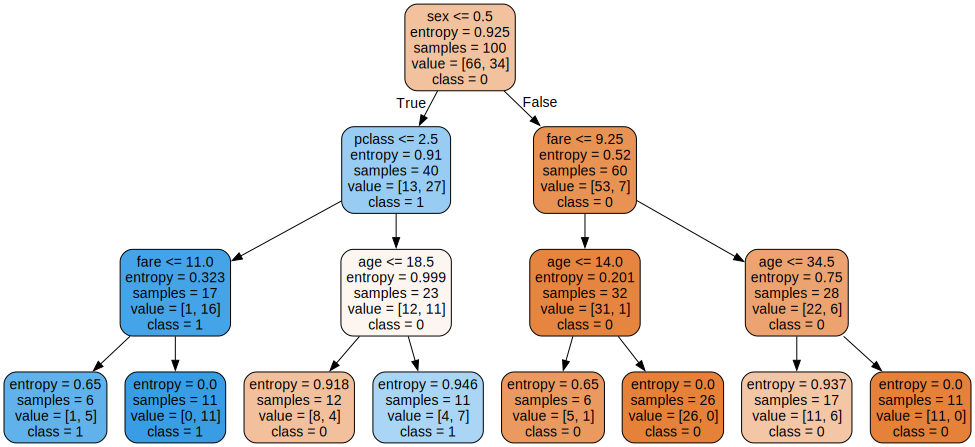

In [52]:
with open("titanic.dot") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='image/decision_trees', cleanup=True)
dot

In [53]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Test Accuracy is: ", accuracy_score(y_test, y_pred)*100)

Test Accuracy is:  88.46153846153845


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[18,  1],
       [ 2,  5]], dtype=int64)

In [55]:
feature_names = ['pclass', 'sec', 'age', 'title', 'fare', 'num_family']
Tom = [1, 1, 33, 1, 50, 4]
Jane = [2, 0, 50, 0, 8.0, 1]

In [56]:
model.predict_proba([Tom])

array([[0.64705882, 0.35294118]])

In [57]:
model.predict_proba([Jane])

array([[0.16666667, 0.83333333]])

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.0)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)
confusion_matrix(y_test, pred)

array([[18,  1],
       [ 2,  5]], dtype=int64)

<Axes: >

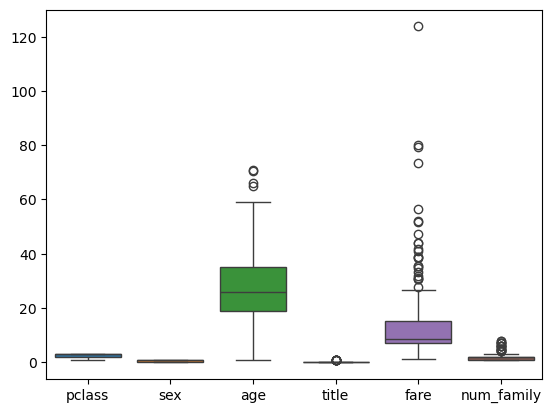

In [60]:
import seaborn as sns
sns.boxplot(data=titanic_df1[['pclass', 'sex', 'age', 'title', 'fare', 'num_family']])

In [62]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
X_mms = mms.fit_transform(X)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)
X_mms_pd.head()

,pclass,sex,age,title,fare,num_family
0,1.0,1.0,0.301696,0.0,0.020329,0.142857
1,0.0,0.0,0.529714,0.0,0.281416,0.142857
2,1.0,0.0,0.358700,0.0,0.055394,0.000000
3,0.0,0.0,0.486960,0.0,0.207276,0.142857
4,1.0,1.0,0.486960,0.0,0.056413,0.000000
